In [5]:
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pickle

os.chdir('..')
sys.path.insert(0, '')

In [18]:
def readout_history(dim):
    """ Reads out history"""

    with open(f'reports/autoencoder_training_curves/train_history_{dim}.pickle', 'rb') as f:
        train_history = pickle.load(f)

    if len(train_history) == 2:
        train_history = train_history[0]
        # train_history[1] are epochs with learning rate schedule, not needed for plotting

    losses = train_history

    train_loss = np.asarray([loss[0] for loss in losses])*1024
    test_loss =  np.asarray([loss[1] for loss in losses])*1024

    return train_loss, test_loss

Text(0.5, 0, 'Epochs')

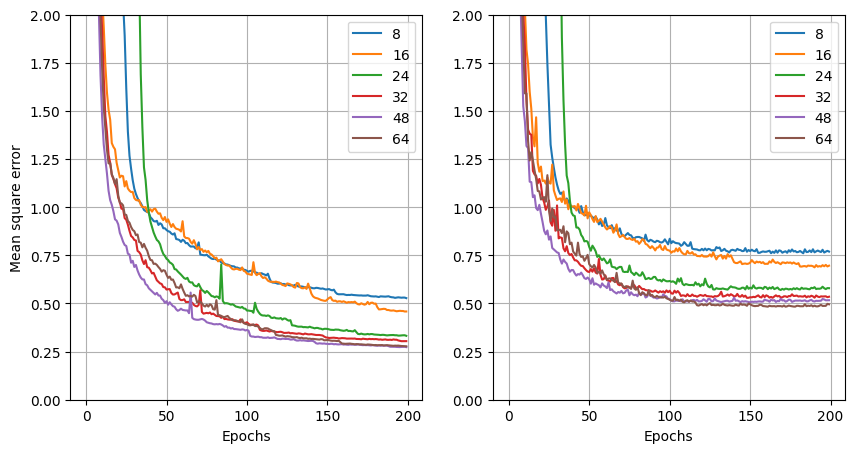

In [13]:
### Plot Training curves for different latent dimensions

plt.figure(figsize=(10,5))

for dim in [8, 16, 24, 32, 48, 64]:

    train_loss, test_loss = readout_history(dim)
    plt.subplot(1,2,1)
    plt.plot(train_loss, label=f'{dim}')

    plt.subplot(1,2,2)
    plt.plot(test_loss, label=f'{dim}')

plt.subplot(1,2,1)
plt.ylim(0, 2)
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean square error')

plt.subplot(1,2,2)
plt.ylim(0, 2)
plt.grid()
plt.legend()
plt.xlabel('Epochs')


Text(0, 0.5, 'Mean square error')

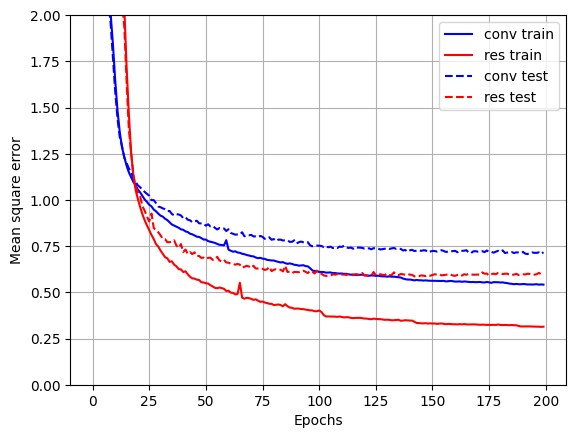

In [20]:
conv='24_conv'
res='24_res'

train_loss_conv, test_loss_conv = readout_history(conv)
train_loss_res, test_loss_res = readout_history(res)

plt.plot(train_loss_conv, 'b', label='conv train')
plt.plot(train_loss_res, 'r', label='res train')
plt.plot(test_loss_conv, 'b--', label='conv test')
plt.plot(test_loss_res, 'r--', label='res test')

plt.ylim(0, 2)
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean square error')